<a href="https://colab.research.google.com/github/Permanganant/EHB-420E---Artificial-Neural-Networks-/blob/main/HW5_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EHB 420E Artificial Neural Networks
# Homework - 5

Mert Alperen Beser

<a href="https://colab.research.google.com/github/sthalles/computer-vision/blob/master/project-4/project-4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://colab.research.google.com/drive/1pkngmhQ8HmFzZZR0jOw4AoujIWIqSMSH#scrollTo=DY-KR9iEEa5P
----------------


## Problem - 1

Use train logistic regression model on the census data set and predict income above $50.000 a
year. Please clearly determine F-score, AUC, ROC? 

----

### Loading Training Csv and Test Csv

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df_train = pd.read_csv('census-train.csv')
df_test = pd.read_csv('census-test.csv')

In [ ]:
list_census_train =list(df_train)
class_names_train = list_census_train[0].split(sep=';')

list_census_test =list(df_test)
class_names_test = list_census_test[0].split(sep=';')

In [ ]:
census_train = pd.read_csv("census-train.csv", sep=';', names=class_names_train)

census_test = pd.read_csv("census-test.csv", sep=';', names=class_names_test)

In [ ]:
census_train = census_train.drop(census_train.index[0])
census_train = census_train.drop('education',axis = 1)

census_test = census_test.drop(census_test.index[0])
census_test = census_test.drop('education',axis = 1)

Copying class names for categorizing operation

In [ ]:
class_names_train =list(census_train)
class_names_test =list(census_test)

class_names_train_copy = class_names_train[:]
class_names_test_copy = class_names_test[:] 

In [ ]:
class_names_train

['age',
 'workclass',
 'fnlwgt',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'label']

### Categorizing the string data with matching each string with a specific integer for both train and test sets

In [ ]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
names = ['capital-gain','capital-loss','hours-per-week','age','education-num','fnlwgt']

for strings in names:
  class_names_train_copy.pop(class_names_train_copy.index(strings))
 
for strings in names:
  class_names_test_copy.pop(class_names_test_copy.index(strings))

categorize_train = census_train[class_names_train_copy] 
categorize_train = categorize_train.apply(le.fit_transform)

categorize_test = census_test[class_names_test_copy] 
categorize_test = categorize_test.apply(le.fit_transform)

In [ ]:
census_train[class_names_train_copy] = categorize_train 
census_train

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
1,39,7,77516,13,4,1,1,4,1,2174,0,40,39,0
2,50,6,83311,13,2,4,0,4,1,0,0,13,39,0
3,38,4,215646,9,0,6,1,4,1,0,0,40,39,0
4,53,4,234721,7,2,6,0,2,1,0,0,40,39,0
5,28,4,338409,13,2,10,5,2,0,0,0,40,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32557,27,4,257302,12,2,13,5,4,0,0,0,38,39,0
32558,40,4,154374,9,2,7,0,4,1,0,0,40,39,1
32559,58,4,151910,9,6,1,4,4,0,0,0,40,39,0
32560,22,4,201490,9,4,1,3,4,1,0,0,20,39,0


In [ ]:
census_test[class_names_test_copy] = categorize_test 
census_test

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
1,25,4,226802,7,4,7,3,2,1,0,0,40,38,0
2,38,4,89814,9,2,5,0,4,1,0,0,50,38,0
3,28,2,336951,12,2,11,0,4,1,0,0,40,38,1
4,44,4,160323,10,2,7,0,2,1,7688,0,40,38,1
5,18,0,103497,10,4,0,3,4,0,0,0,30,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16277,39,4,215419,13,0,10,1,4,0,0,0,36,38,0
16278,64,0,321403,9,6,0,2,2,1,0,0,40,38,0
16279,38,4,374983,13,2,10,0,4,1,0,0,50,38,0
16280,44,4,83891,13,0,1,3,1,1,5455,0,40,38,0


In [ ]:
X_train = census_train.drop(['label'], axis=1)
y_train = census_train['label'] 

In [ ]:
X_train

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
1,39,7,77516,13,4,1,1,4,1,2174,0,40,39
2,50,6,83311,13,2,4,0,4,1,0,0,13,39
3,38,4,215646,9,0,6,1,4,1,0,0,40,39
4,53,4,234721,7,2,6,0,2,1,0,0,40,39
5,28,4,338409,13,2,10,5,2,0,0,0,40,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32557,27,4,257302,12,2,13,5,4,0,0,0,38,39
32558,40,4,154374,9,2,7,0,4,1,0,0,40,39
32559,58,4,151910,9,6,1,4,4,0,0,0,40,39
32560,22,4,201490,9,4,1,3,4,1,0,0,20,39


In [ ]:
X_test = census_test.drop(['label'], axis=1)
y_test = census_test['label'] 

In [ ]:
#Shapes of the train and test sets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(32561, 13)
(32561,)
(16281, 13)
(16281,)


### Preprocessing the Data Before Training

In [ ]:
#pop 'label' from the class names
class_names_train.pop(-1)

'label'

*This function detects which class is the most irrelevant and deflects the test accuracy and dropping from our data set for the best accuracy rate*

In [ ]:
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
f1_scores = []
for name in class_names_train:
  X_train = census_train.drop([name], axis=1)
  y_train = census_train['label'] 
  X_test = census_test.drop([name], axis=1)
  y_test = census_test['label'] 
  print(name)
  
  lr.fit(X_train, y_train)
  y_preds = lr.predict(X_test) 
  f1 = f1_score(y_test, y_preds)
  print("F1-Score: ",f1)   

  f1_scores.append(f1)

max_f1 = max(f1_scores)
max_f1_index = f1_scores.index(max_f1)

X_train_max = census_train.drop([class_names_train[max_f1_index],'label'], axis=1)
y_train_max = census_train['label'] 

X_test_max = census_test.drop([class_names_train[max_f1_index],'label'], axis=1)
y_test_max = census_test['label']

age
F1-Score:  0.39280983916745504
workclass
F1-Score:  0.401291016675632
fnlwgt
F1-Score:  1.0
education-num
F1-Score:  0.39964125560538116
marital-status
F1-Score:  0.4002147843207446
occupation
F1-Score:  0.40078796561604585
relationship
F1-Score:  0.4002145922746781
race
F1-Score:  0.4005737851891698
sex
F1-Score:  0.40100430416068866
capital-gain
F1-Score:  0.1930420025456088
capital-loss
F1-Score:  0.32034454470877766
hours-per-week
F1-Score:  0.4072937353312872
native-country
F1-Score:  0.3805360197681049


New training data with most relevant classes

In [ ]:
X_train_max

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
1,39,7,13,4,1,1,4,1,2174,0,40,39
2,50,6,13,2,4,0,4,1,0,0,13,39
3,38,4,9,0,6,1,4,1,0,0,40,39
4,53,4,7,2,6,0,2,1,0,0,40,39
5,28,4,13,2,10,5,2,0,0,0,40,5
...,...,...,...,...,...,...,...,...,...,...,...,...
32557,27,4,12,2,13,5,4,0,0,0,38,39
32558,40,4,9,2,7,0,4,1,0,0,40,39
32559,58,4,9,6,1,4,4,0,0,0,40,39
32560,22,4,9,4,1,3,4,1,0,0,20,39


### Training the Data

Plotting Function

In [ ]:
def plot_linear_regression(X_test,y_test):
  ns_probs = [0 for _ in range(len(y_test))]
  lr.fit(X_test,y_test)
  probs = lr.predict_proba(X_test) 
  probs = probs[:, 1]

  ns_auc = roc_auc_score(y_test, ns_probs)
  lr_auc = roc_auc_score(y_test, probs)

  print('No Skill: ROC AUC=%.3f' % (ns_auc))
  print('Logistic: ROC AUC=%.3f' % (lr_auc))

  ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
  lr_fpr, lr_tpr, _ = roc_curve(y_test, probs)

  plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill',c ='black')
  plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic',c ='blue')

  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')

  plt.legend()
  plt.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.850


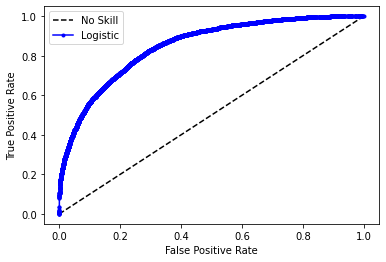

In [ ]:
plot_linear_regression(X_test_max,y_test_max)

## Problem - 2
Plot decision boundaries below format with color coded. Use decision boundaries of different
classifiers “Decision Tree”, “Logic regression”, “SVM-Linear”, SVM-RBF” Please give clear
example when to use which classifier and why? How accurate you models? Data set:
X1X2Y.csv

----

### Loading Training Csv and Test Csv

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('X1X2Y.csv',sep=';', decimal=",")

In [ ]:
df

,x1,x2,y
0,0.336494,-0.985951,0.0
1,-0.011043,-0.105529,1.0
2,0.238160,-0.617417,1.0
3,-0.366783,-0.713819,1.0
4,1.221923,-1.039399,0.0
...,...,...,...
95,-1.457533,-1.306791,0.0
96,1.635614,0.273943,0.0
97,0.113120,0.020465,1.0
98,0.753405,0.193830,1.0


### Preprocessing the Data Before Training

Converting string 'y' values to the float and merge the 'x1' and 'x2'

In [ ]:
y = df['y']
y = y.astype(np.float)
X_train = df.iloc[:,0:2]

Converting X and y to numpy array

In [ ]:
X_train = X_train.to_numpy()
y = y.to_numpy()

Converting y to integer numpy array

In [ ]:
y= y.astype(int)

### Training the Data with “Decision Tree”, “Logic regression”, “SVM-Linear”, SVM-RBF” Methods and Plotting the Results in Desired Format

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(),

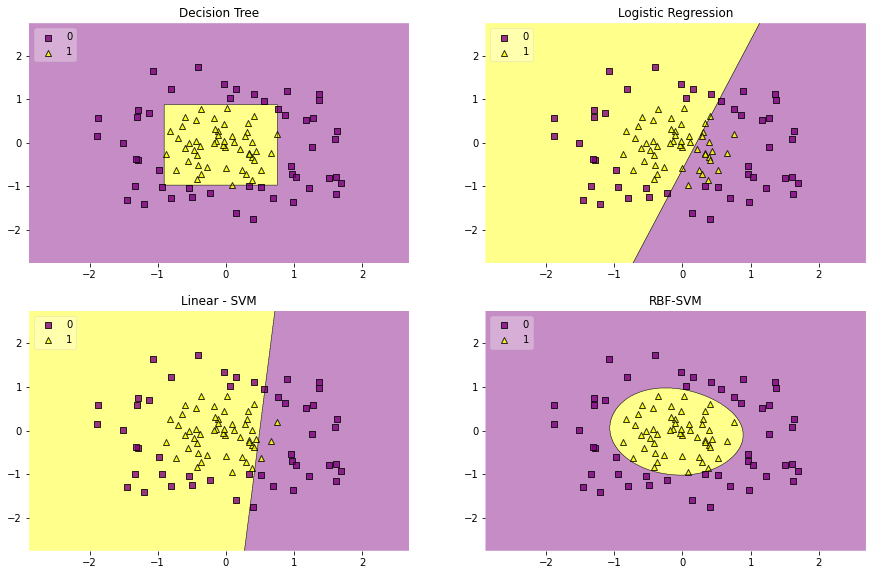

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
%matplotlib inline

clf1 = DecisionTreeClassifier()
clf2 = LogisticRegression()
clf3 = SVC(gamma='auto',kernel='linear')
clf4 = SVC(gamma='auto',kernel='rbf')

gs = gridspec.GridSpec(3, 2)
fig = plt.figure(figsize=(15,15))
labels = ['Decision Tree','Logistic Regression', 'Linear - SVM', 'RBF-SVM']

for clf, lab, grd in zip([clf1, clf2, clf3, clf4],labels,[(0,0), (0,1), (1,0), (1,1)]):
    clf.fit(X_train, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train, y=y, clf=clf, legend=2,colors ='purple,yellow')
    plt.title(lab)
plt.show()

## Problem - 3
Use K-means clustering, K=3, plot the date as the example below and reach the answer
provided. (Data set is Cat.csv) Hint: You need to use answer to reach the question. 

----


### Loading the Data

In [ ]:
import pandas as pd
from pandas.core.frame import DataFrame
df_train = pd.read_csv('Cat.csv')

In [ ]:
df_train = pd.read_csv("Cat.csv", 
                  sep=' ', 
                  names=['X','Y','Class'])

### Preprocessing the Data

Getting Head, Ear_left and Ear_right rows from the data

In [ ]:
Head = df_train[14:304]
Ear_left = df_train[316:416]
Ear_right = df_train[428:528]

In [ ]:
frames = [Head, Ear_left, Ear_right]
df_train = pd.concat(frames)

In [ ]:
df_train

,X,Y,Class
14,0.45660137634625386,0.43280640922410835,"Head;,,,,,,,,,"
15,0.6113784672224188,0.5286245988894975,"Head;,,,,,,,,,"
16,0.45029897412145387,0.7116061205092745,"Head;,,,,,,,,,"
17,0.6390150501606866,0.46074398219372076,"Head;,,,,,,,,,"
18,0.6289567839292338,0.32346951478531516,"Head;,,,,,,,,,"
...,...,...,...
523,0.8248418521018915,0.7134157163726719,"Ear_right;,,,,,,,,,"
524,0.8239586646098369,0.7675190168773441,"Ear_right;,,,,,,,,,"
525,0.8155149407204317,0.7135170163641819,"Ear_right;,,,,,,,,,"
526,0.7856914234307533,0.6819138433217659,"Ear_right;,,,,,,,,,"


In [ ]:
df1  = pd.DataFrame(columns=['X','Y','Class'])

In [ ]:
df_train

,X,Y,Class
14,0.45660137634625386,0.43280640922410835,"Head;,,,,,,,,,"
15,0.6113784672224188,0.5286245988894975,"Head;,,,,,,,,,"
16,0.45029897412145387,0.7116061205092745,"Head;,,,,,,,,,"
17,0.6390150501606866,0.46074398219372076,"Head;,,,,,,,,,"
18,0.6289567839292338,0.32346951478531516,"Head;,,,,,,,,,"
...,...,...,...
523,0.8248418521018915,0.7134157163726719,"Ear_right;,,,,,,,,,"
524,0.8239586646098369,0.7675190168773441,"Ear_right;,,,,,,,,,"
525,0.8155149407204317,0.7135170163641819,"Ear_right;,,,,,,,,,"
526,0.7856914234307533,0.6819138433217659,"Ear_right;,,,,,,,,,"


Elimination of the commas in Classes

In [ ]:
for index, row in df_train.iterrows():
  i = row['Class']
  index = list(i).index(';')
  i = i[:index]
  df1 = df1.append({'X':row['X'],'Y':row['Y'],'Class': i}, ignore_index=True)

In [ ]:
df_train = df1
df_train

,X,Y,Class
0,0.45660137634625386,0.43280640922410835,Head
1,0.6113784672224188,0.5286245988894975,Head
2,0.45029897412145387,0.7116061205092745,Head
3,0.6390150501606866,0.46074398219372076,Head
4,0.6289567839292338,0.32346951478531516,Head
...,...,...,...
485,0.8248418521018915,0.7134157163726719,Ear_right
486,0.8239586646098369,0.7675190168773441,Ear_right
487,0.8155149407204317,0.7135170163641819,Ear_right
488,0.7856914234307533,0.6819138433217659,Ear_right


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

### Visualizing the Data

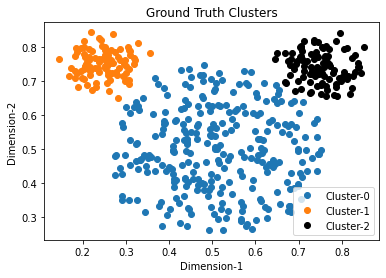

In [ ]:
x = np.array(df_train['X'])
x = x.astype(np.float)
y = np.array(df_train['Y'])
y = y.astype(np.float)

x1 = x[0:290]
x2 = x[290:389]
x3 = x[390:490]
y1 = y[0:290]
y2 = y[290:389]
y3 = y[390:490]

plt.figure(1)
plt.plot(x1,y1,'o')
plt.plot(x2,y2,'o')
plt.plot(x3,y3,'o',color='black')
plt.xlabel('Dimension-1')
plt.ylabel('Dimension-2')
plt.title('Ground Truth Clusters')
plt.legend(['Cluster-0','Cluster-1','Cluster-2'])

Merging X and Y values in one

In [ ]:
X = df_train.iloc[:,0:2]

### Training the Data and Plotting the Classified Clusters 

Text(0, 0.5, 'Dimension-2')

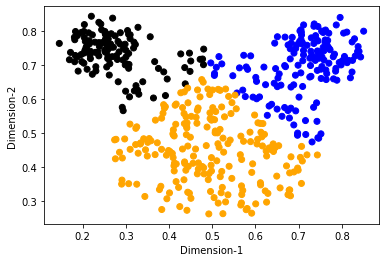

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
from matplotlib import colors
kmeans = KMeans(3)
kmeans.fit(X)
identified_clusters = kmeans.fit_predict(X)
identified_clusters

cmap = colors.ListedColormap(['blue', 'black','orange'])
data_with_clusters = df_train.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(x,y,c=data_with_clusters['Clusters'],cmap=cmap)
plt.xlabel('Dimension-1')
plt.ylabel('Dimension-2')

## Problem - 4
Try to do 10 fold cross validation using ship.csv data set. 

----

### Reading Csv Data

In [ ]:
import pandas as pd
df = pd.read_csv('Ship.csv',sep=';', decimal=",")

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Preprocessing the data

Dropping the 'Name', 'Ticket', 'Cabin', 'PassengerId' from the dataset. These classes were dropped because they are independent of the output of our dataset. In other words, these classes have no relevance with the 'Survived' data, even they can deflect our training accuracy.

In [ ]:
df = df.drop(['Name'],axis =1)
df = df.drop(['Ticket'],axis =1)
df = df.drop(['Cabin'],axis =1)
df = df.drop(['PassengerId'],axis =1)

This code below eliminates the entire row for unknown(NaN) age value from the dataset.


In [ ]:
for index, row in df.iterrows():
  i = row['Age']
  try:
    a = int(i)
  except:
    df  = df.drop(index)

Cleaned data set

In [ ]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
889,1,1,male,26.0,0,0,30.0000,C


In [ ]:
class_names =list(df)
class_names_c = class_names[:]
class_names_c

['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

### Categorizing the string data with matching each string with a specific integer for both train and test sets

In [ ]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
names = ['Survived','Pclass','Age','SibSp','Parch','Fare']

for strings in names:
  class_names_c.pop(class_names_c.index(strings))
 
categorize_train = df[class_names_c] 
categorize_train = categorize_train.apply(le.fit_transform)

In [ ]:
df[class_names_c] = categorize_train 
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
885,0,3,0,39.0,0,5,29.1250,1
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
889,1,1,1,26.0,0,0,30.0000,0


Separating the output data

In [ ]:
y = df['Survived']

Merging the training input data in one

In [ ]:
X = df.iloc[:,0:7]
X

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
885,0,3,0,39.0,0,5,29.1250
886,0,2,1,27.0,0,0,13.0000
887,1,1,0,19.0,0,0,30.0000
889,1,1,1,26.0,0,0,30.0000


Converting the training input and output to NumPy array

In [ ]:
import numpy as np

In [ ]:
X = X.to_numpy()
y = y.to_numpy()
y = y.astype(np.int)

In [ ]:
X = df.iloc[:,0:7]
X = X.to_numpy()

### Training the data


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

#### Logistic Regression

This function calculates accuracy for each random_state value and finds the maximum accuracy value condition for chosen machine learning method.

In [ ]:
acc_max = []
for i in range(0,200):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=i)
  clf = LogisticRegression().fit(X_train, y_train)
  yhat_test = clf.predict(X_test)
  acc = accuracy_score(y_test, yhat_test)
  acc_max.append(acc)
acc_max = np.array(acc_max)
rand_max = acc_max.argmax()
print(rand_max)

51


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=rand_max)

In [ ]:
from sklearn.model_selection import cross_val_score
clf = LogisticRegression(random_state=0,max_iter = 1000).fit(X_train,y_train)
#10 fold Cross-Validation
scores = cross_val_score(clf, X_test, y_test, cv=10)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.71 accuracy with a standard deviation of 0.15


#### Decision Tree Classifier

This function calculates accuracy for each random_state value and finds the maximum accuracy value condition for chosen machine learning method.

In [ ]:
acc_max = []
for i in range(0,200):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=i)
  clf = DecisionTreeClassifier().fit(X_train,y_train)
  yhat_test = clf.predict(X_test)
  acc = accuracy_score(y_test, yhat_test)
  acc_max.append(acc)
acc_max = np.array(acc_max)
rand_max = acc_max.argmax()
print(rand_max)

14


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=rand_max)

In [ ]:
from sklearn.metrics import accuracy_score
clf = DecisionTreeClassifier(random_state=0).fit(X_train,y_train)
#10 fold Cross-Validation
scores = cross_val_score(clf, X_test, y_test, cv=10)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.76 accuracy with a standard deviation of 0.14


#### SVM - RBF 

This function calculates accuracy for each random_state value and finds the maximum accuracy value condition for chosen machine learning method.

In [ ]:
acc_max = []
for i in range(0,200):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=i)
  clf = make_pipeline(StandardScaler(), SVC(kernel = 'rbf')).fit(X_train, y_train)
  yhat_test = clf.predict(X_test)
  acc = accuracy_score(y_test, yhat_test)
  acc_max.append(acc)
acc_max = np.array(acc_max)
rand_max = acc_max.argmax()
print(rand_max)

152


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=rand_max)

In [ ]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(kernel = 'rbf')).fit(X_train, y_train)
#10 fold Cross-Validation
scores = cross_val_score(clf, X_test, y_test, cv=10)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.81 accuracy with a standard deviation of 0.11


#### SVM - Linear

This function calculates accuracy for each random_state value and finds the maximum accuracy value condition for chosen machine learning method.

In [ ]:
acc_max = []
for i in range(0,200):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=i)
  clf = make_pipeline(StandardScaler(), SVC(kernel = 'linear')).fit(X_train, y_train)
  yhat_test = clf.predict(X_test)
  acc = accuracy_score(y_test, yhat_test)
  acc_max.append(acc)
acc_max = np.array(acc_max)
rand_max = acc_max.argmax()
print(rand_max)

2


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=rand_max)

In [ ]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(kernel = 'linear')).fit(X_train, y_train)
#10 fold Cross-Validation
scores = cross_val_score(clf, X_test, y_test, cv=10)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.78 accuracy with a standard deviation of 0.14


#### Neural Network

This function calculates accuracy for each random_state value and finds the maximum accuracy value condition for chosen machine learning method.

In [ ]:
acc_max = []
for i in range(0,200):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=i)
  clf = MLPClassifier(hidden_layer_sizes=(10,	10,	10,	10), max_iter=1000).fit(X_train, y_train)
  yhat_test = clf.predict(X_test)
  acc = accuracy_score(y_test, yhat_test)
  acc_max.append(acc)
acc_max = np.array(acc_max)
rand_max = acc_max.argmax()
print(rand_max)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=rand_max)

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
clf = MLPClassifier(hidden_layer_sizes=(10,	10,	10,	10), max_iter=1000).fit(X_train, y_train)
#10 fold Cross-Validation
scores = cross_val_score(clf, X_test, y_test, cv=10)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

#### Visualization of Different Methods

PCA was used for dimensionality reduction because our dimension of data set is bigger than 2

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(),

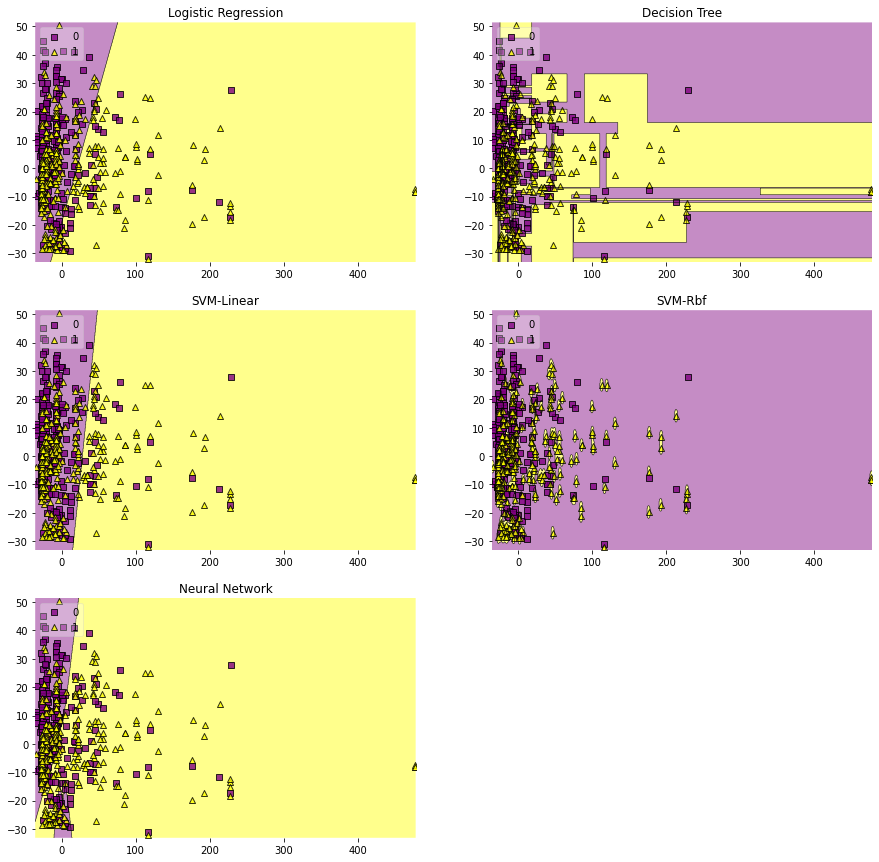

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
%matplotlib inline

#PCA
pca = PCA(n_components = 2)
X = pca.fit_transform(X)

#Methods
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()
clf3 = SVC(gamma='auto',kernel='linear')
clf4 = SVC(gamma='auto',kernel='rbf')
clf5 = MLPClassifier()

gs = gridspec.GridSpec(3, 2)
fig = plt.figure(figsize=(15,15))
labels = ['Logistic Regression', 'Decision Tree', 'SVM-Linear', 'SVM-Rbf',  'Neural Network']

for clf, lab, grd in zip([clf1, clf2, clf3, clf4, clf5,],labels,[(0,0), (0,1), (1,0), (1,1), (2,0)]):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2,colors ='purple,yellow')
    plt.title(lab)
plt.show()